<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/logo_CV.jpeg" style="width:1500px;heigth:100px">


# <center> 04. Spatial image processing: The convolution </center>


## <span style="color:red"> Outline </span> 
1. **Principles on convolution**
2. **Main convolution filters**
3. **Convolution features for classification**

In [ ]:
import cv2 as cv
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## <span style="color:green"> If you are in colaboratoy </span>: 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My Drive/cv-uis-student/notebooks
!pwd

## <span style="color:red"> 1. Principles on Convolution </span> 

The convolution is a **fundamental** operation in image processing to compute **visual features**. The convolution operation is illustrated in Figure. For instance, a **KERNEL** mask with size $3 \times 3$ is sliding around the image. At each position, each corresponding pixel is multiplied by corresponding value in **kernel**  and finally the values are sum up  to obtain a new estimated value. 

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/Convolution_schematic.gif" style="width:200px">


The general expression in discrete signals for convolution is: 

$$y(n) = \sum_{K=-\infty}^{\infty} x(k)h(n-k)$$, 
$$y(n) = x(k)*h(n)$$

, so, for images (signals in 2D), the convolution operation could be defined as: 

$$I(x,y) = \sum_{u=0}^{n} \sum_{v=0}^{m} I(x,y)h(u-x, v-y)$$, 
$$\hat{I}(x,y) = I(x,y)*h(x,y)$$

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/FM_conv2.png" style="width:250px">

**Go to the action!**

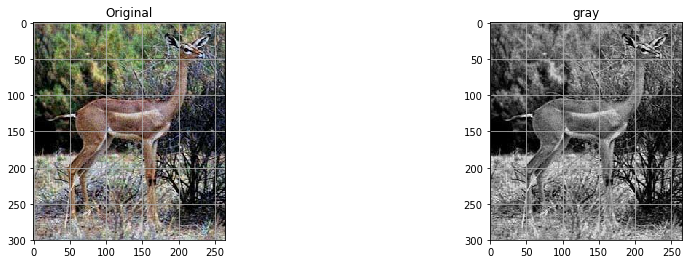

In [2]:
I_col = cv.cvtColor(cv.imread("../data/image_set/gerenuk/image_0025.jpg"), cv.COLOR_RGB2BGR)
I_gra = cv.cvtColor(I_col, cv.COLOR_RGB2GRAY)

plt.figure(figsize=(15,4))
plt.subplot(121),plt.imshow(I_col),plt.title('Original'), plt.grid();
plt.subplot(122),plt.imshow(I_gra, cmap='gray'),plt.title('gray'), plt.grid();

## <span style="color:red"> 2. Main convolution filters </span> 

In literature, there exist a lot of handcraft filters (kernels) that have been designed to obtain a special efect or to compute some properties on images. These filters process **Locally** the images, *i.e.,* combine the pixel of actual position with their
neighbors.

### 2.1 Smooting images: Mean Filter. 

It is a simple, intuitive and easy smoothing method, used to reduce (reduce noise) the amount of intensity variation between one pixel and the next. So: 

- Replace each pixel by the average of pixel plus neighbors: $I(u,v) = \frac{p_0+\ldots p_9}{9}$
- The same operation can be achieved by convolving with kernel: 
$$\frac{1}{9}\begin{bmatrix}
 1& 1 &1 \\ 
1 & 1 &1 \\ 
1 &  1& 1
\end{bmatrix}$$


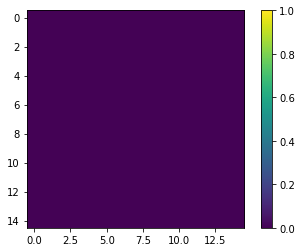

In [3]:
# visualize kernel
kernel = np.ones((15,15),np.float32)/(15*15)
dst = cv.filter2D(I_col,-1,kernel)
plt.imshow(kernel, vmin=0, vmax=1);
plt.colorbar();

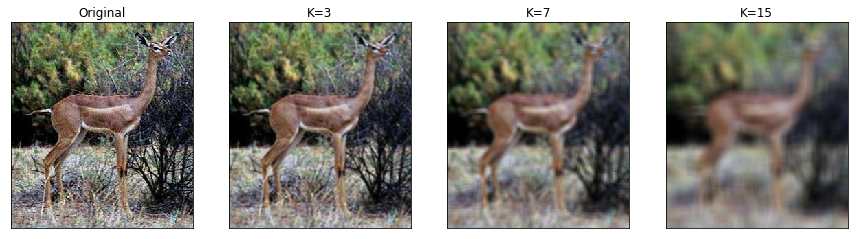

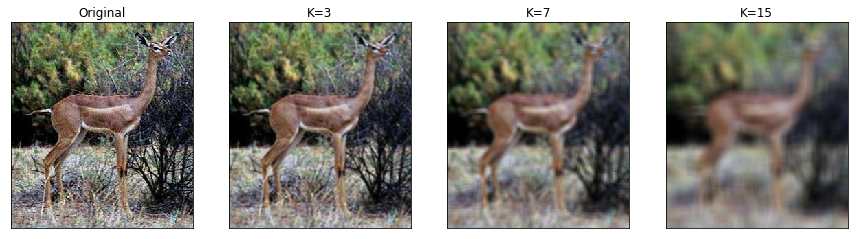

In [4]:
# apply kernel at several sigmas
size_k=3; kernel_3 = np.ones((size_k,size_k),np.float32)/(size_k*size_k)
size_k=7; kernel_7 = np.ones((size_k,size_k),np.float32)/(size_k*size_k)
size_k=15; kernel_15 = np.ones((size_k,size_k),np.float32)/(size_k*size_k)

#-1 the same size as input
dst_3 = cv.filter2D(I_col,-1,kernel_3)
dst_7 = cv.filter2D(I_col,-1,kernel_7)
dst_15 = cv.filter2D(I_col,-1,kernel_15)

# with opencv
blur_3 = cv.blur(I_col,(3,3))
blur_7 = cv.blur(I_col,(7,7))
blur_15 = cv.blur(I_col,(15,15))

plt.figure(figsize=(15,7))
plt.subplot(141),plt.imshow(I_col,'gray'),plt.title('Original'),plt.xticks([]),plt.yticks([]);
plt.subplot(142),plt.imshow(dst_3,'gray'), plt.title('K=3'),plt.xticks([]), plt.yticks([]); 
plt.subplot(143), plt.imshow(dst_7,'gray'), plt.title('K=7'),plt.xticks([]), plt.yticks([]);
plt.subplot(144), plt.imshow(dst_15,'gray'), plt.title('K=15'),plt.xticks([]), plt.yticks([]);


plt.figure(figsize=(15,7))
plt.subplot(141), plt.imshow(I_col,'gray'),plt.title('Original'), plt.xticks([]), plt.yticks([]);
plt.subplot(142), plt.imshow(blur_3,'gray'), plt.title('K=3'), plt.xticks([]), plt.yticks([]);
plt.subplot(143), plt.imshow(blur_7,'gray'), plt.title('K=7'),plt.xticks([]), plt.yticks([]); 
plt.subplot(144), plt.imshow(blur_15,'gray'), plt.title('K=15'),plt.xticks([]), plt.yticks([]); 


In [ ]:
np.max(dst_15-blur_15)

### 2.2 Smooting images: Gaussian Filter. 

One of the most useful and know filters, tha weight the pixel in the windows according to the spatial location. This effect can be achieved by convolving the image with a Gaussian kernel: 

$$h(x,y) = \frac{1}{2\pi\sigma^{2}} e^{-\frac{x^{2} + y^{2}}{2 \sigma^{2}}}$$


- Pixel closer at center are more important

<img src="../imgs/gaus.png" style="width:450px">

(20, 20)


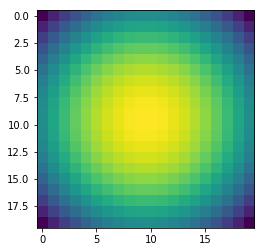

In [16]:
kernel_Gauss = cv.getGaussianKernel(20, sigma=40.3)
mat_G = np.multiply(kernel_Gauss, kernel_Gauss.T)
print (mat_G.shape)
plt.imshow(mat_G)

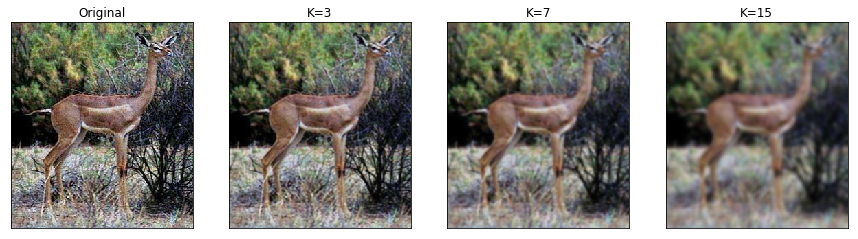

In [17]:
# apply kernel at several sigmas 

blur_G3 = cv.GaussianBlur(I_col,(3,3),0)
blur_G7 = cv.GaussianBlur(I_col,(7,7),0)
blur_G15 = cv.GaussianBlur(I_col,(15,15),0)


plt.figure(figsize=(15,7))
plt.subplot(141),plt.imshow(I_col,'gray'),plt.title('Original'),plt.xticks([]),plt.yticks([]);
plt.subplot(142),plt.imshow(blur_G3,'gray'), plt.title('K=3'),plt.xticks([]), plt.yticks([]); 
plt.subplot(143), plt.imshow(blur_G7,'gray'), plt.title('K=7'),plt.xticks([]), plt.yticks([]);
plt.subplot(144), plt.imshow(blur_G15,'gray'), plt.title('K=15'),plt.xticks([]), plt.yticks([]);

    

## <span style="color:orange">student challenge</span>: 

- Run Gaussian kernel on image explanation using convolve2D 
- Run Gaussian kernel created on `getGaussianKernel`  

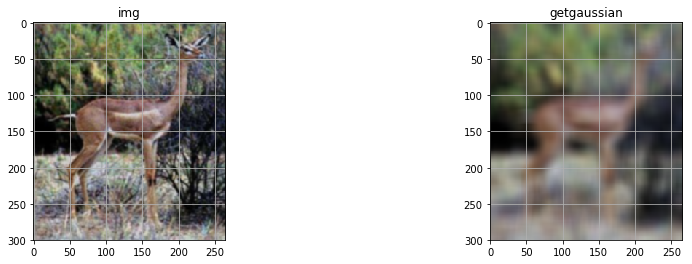


### 2.3 Geometrial information:Deriving images

We namely dont need color information. The geometrical information can be obtained from gradient of images, as: 

$$\hat{I}(x, y) = \frac{\partial I(x, y)}{\partial x,  \partial y}$$

We need to **Derivate** images. Recall that we can compute derivetes of a discrete function, as: 

$$\frac{df}{du} \approx  \frac{f(u+1) - f(u-1)}{2} = 0.5 (f(u+1) - f(u-1))$$

So, me can make a linear filter that computes central differences
$$H_x = \left [ -0.5, 0, 0.5 \right ] =0.5 \left [ -1, 0, 1 \right ]$$

<img src="../imgs/der.png" style="width:450px">

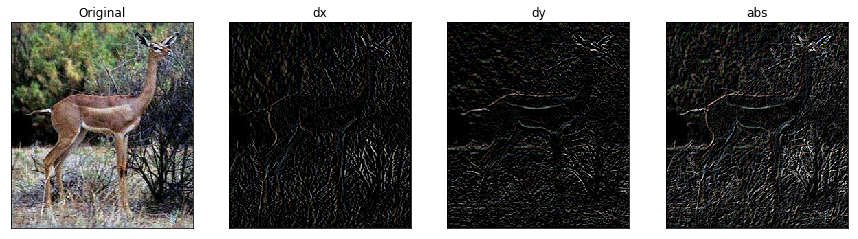

In [18]:
k_x = np.array([[0,0,0],[-1,0,1],[0,0,0]], dtype=np.float32)
k_y = np.array([[0,-1,0],[0,0,0],[0,1,0]], dtype=np.float32)


dx = cv.filter2D(I_col,-1,k_x)
dy = cv.filter2D(I_col,-1,k_y)

plt.figure(figsize=(15,7))
plt.subplot(141),plt.imshow(I_col,'gray'),plt.title('Original'),plt.xticks([]),plt.yticks([]);
plt.subplot(142),plt.imshow(dx,'gray'), plt.title('dx'),plt.xticks([]), plt.yticks([]); 
plt.subplot(143), plt.imshow(dy,'gray'), plt.title('dy'),plt.xticks([]), plt.yticks([]);
plt.subplot(144), plt.imshow((np.abs(dx) + np.abs(dy)),'gray'), plt.title('abs'),plt.xticks([]), plt.yticks([]);


### Prewitt and Sobel 

For instance, some kernels to compute more accurate derivates: 
- prewitt

$$\begin{bmatrix}
1 & 1 & 1\\ 
0 & 0 & 0\\ 
-1 & -1  & -1 
\end{bmatrix}$$

- Sobel 

$$\begin{bmatrix}
1 & 2& 1\\ 
0 & 0 & 0\\ 
-1 & -2  & -1 
\end{bmatrix}$$
    
Analyze such operations in images      


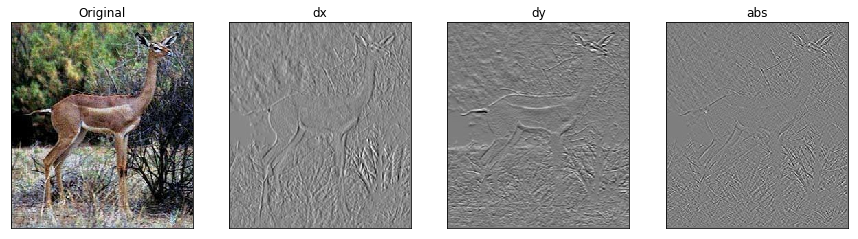

In [19]:
ddepth = cv.CV_16S
scale = 1
delta = 0
grad_x = cv.Sobel(I_gra, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
grad_y = cv.Sobel(I_gra, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
grad_xy = cv.Sobel(I_gra, ddepth, 1, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    
plt.figure(figsize=(15,7))
plt.subplot(141),plt.imshow(I_col,'gray'),plt.title('Original'),plt.xticks([]),plt.yticks([]);
plt.subplot(142),plt.imshow(grad_x,'gray'), plt.title('dx'),plt.xticks([]), plt.yticks([]); 
plt.subplot(143), plt.imshow(grad_y,'gray'), plt.title('dy'),plt.xticks([]), plt.yticks([]);
plt.subplot(144), plt.imshow(grad_xy,'gray'), plt.title('abs'),plt.xticks([]), plt.yticks([]);


## <span style="color:orange">student</span>: 

-  Implement the prewitt version and substract images between sobel and prewitt. Some differences?
- **Which represent the next function kernel??**

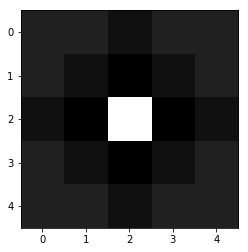

In [20]:
f_gauss_5 = np.array([[  0,  0, -1,  0,  0],
                      [  0, -1, -2, -1,  0],
                      [ -1, -2, 16, -2, -1], 
                      [  0, -1, -2, -1,  0],
                      [  0,  0, -1,  0,  0]])

f_gauss_5 = f_gauss_5/25.
c_gauss = cv.filter2D(I_col,-1,f_gauss_5)

plt.imshow(f_gauss_5, cmap = plt.cm.Greys_r)

## <span style="color:orange"> Student Challenge </span>: 

- Load Image dataset and try to classify after some convolution. Which could be better?
- **Multi-scale analysis: ** Now, convolve several times with a incremental gaussian and then derivate. This is yout new descriptor. What happened with classification?

# References

[1]. [Opencv Doc](https://docs.opencv.org/3.0.0/d8/dfe/classcv_1_1VideoCapture.html)


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/bannerThanks.jpg" style="width:1000px;">